# Hier probieren wir GPT4Vision aus

### GPT4Vision könnte eine gute Wahl sein um einen bestimmten Eintrag aus wechseln formattierten Pdfs auszulesen. 

Dies ist ein separates Notebook, welches die Installation der folgenden Imports benötigt.

In [9]:
import base64
import requests
from openai import OpenAI
from IPython.display import HTML



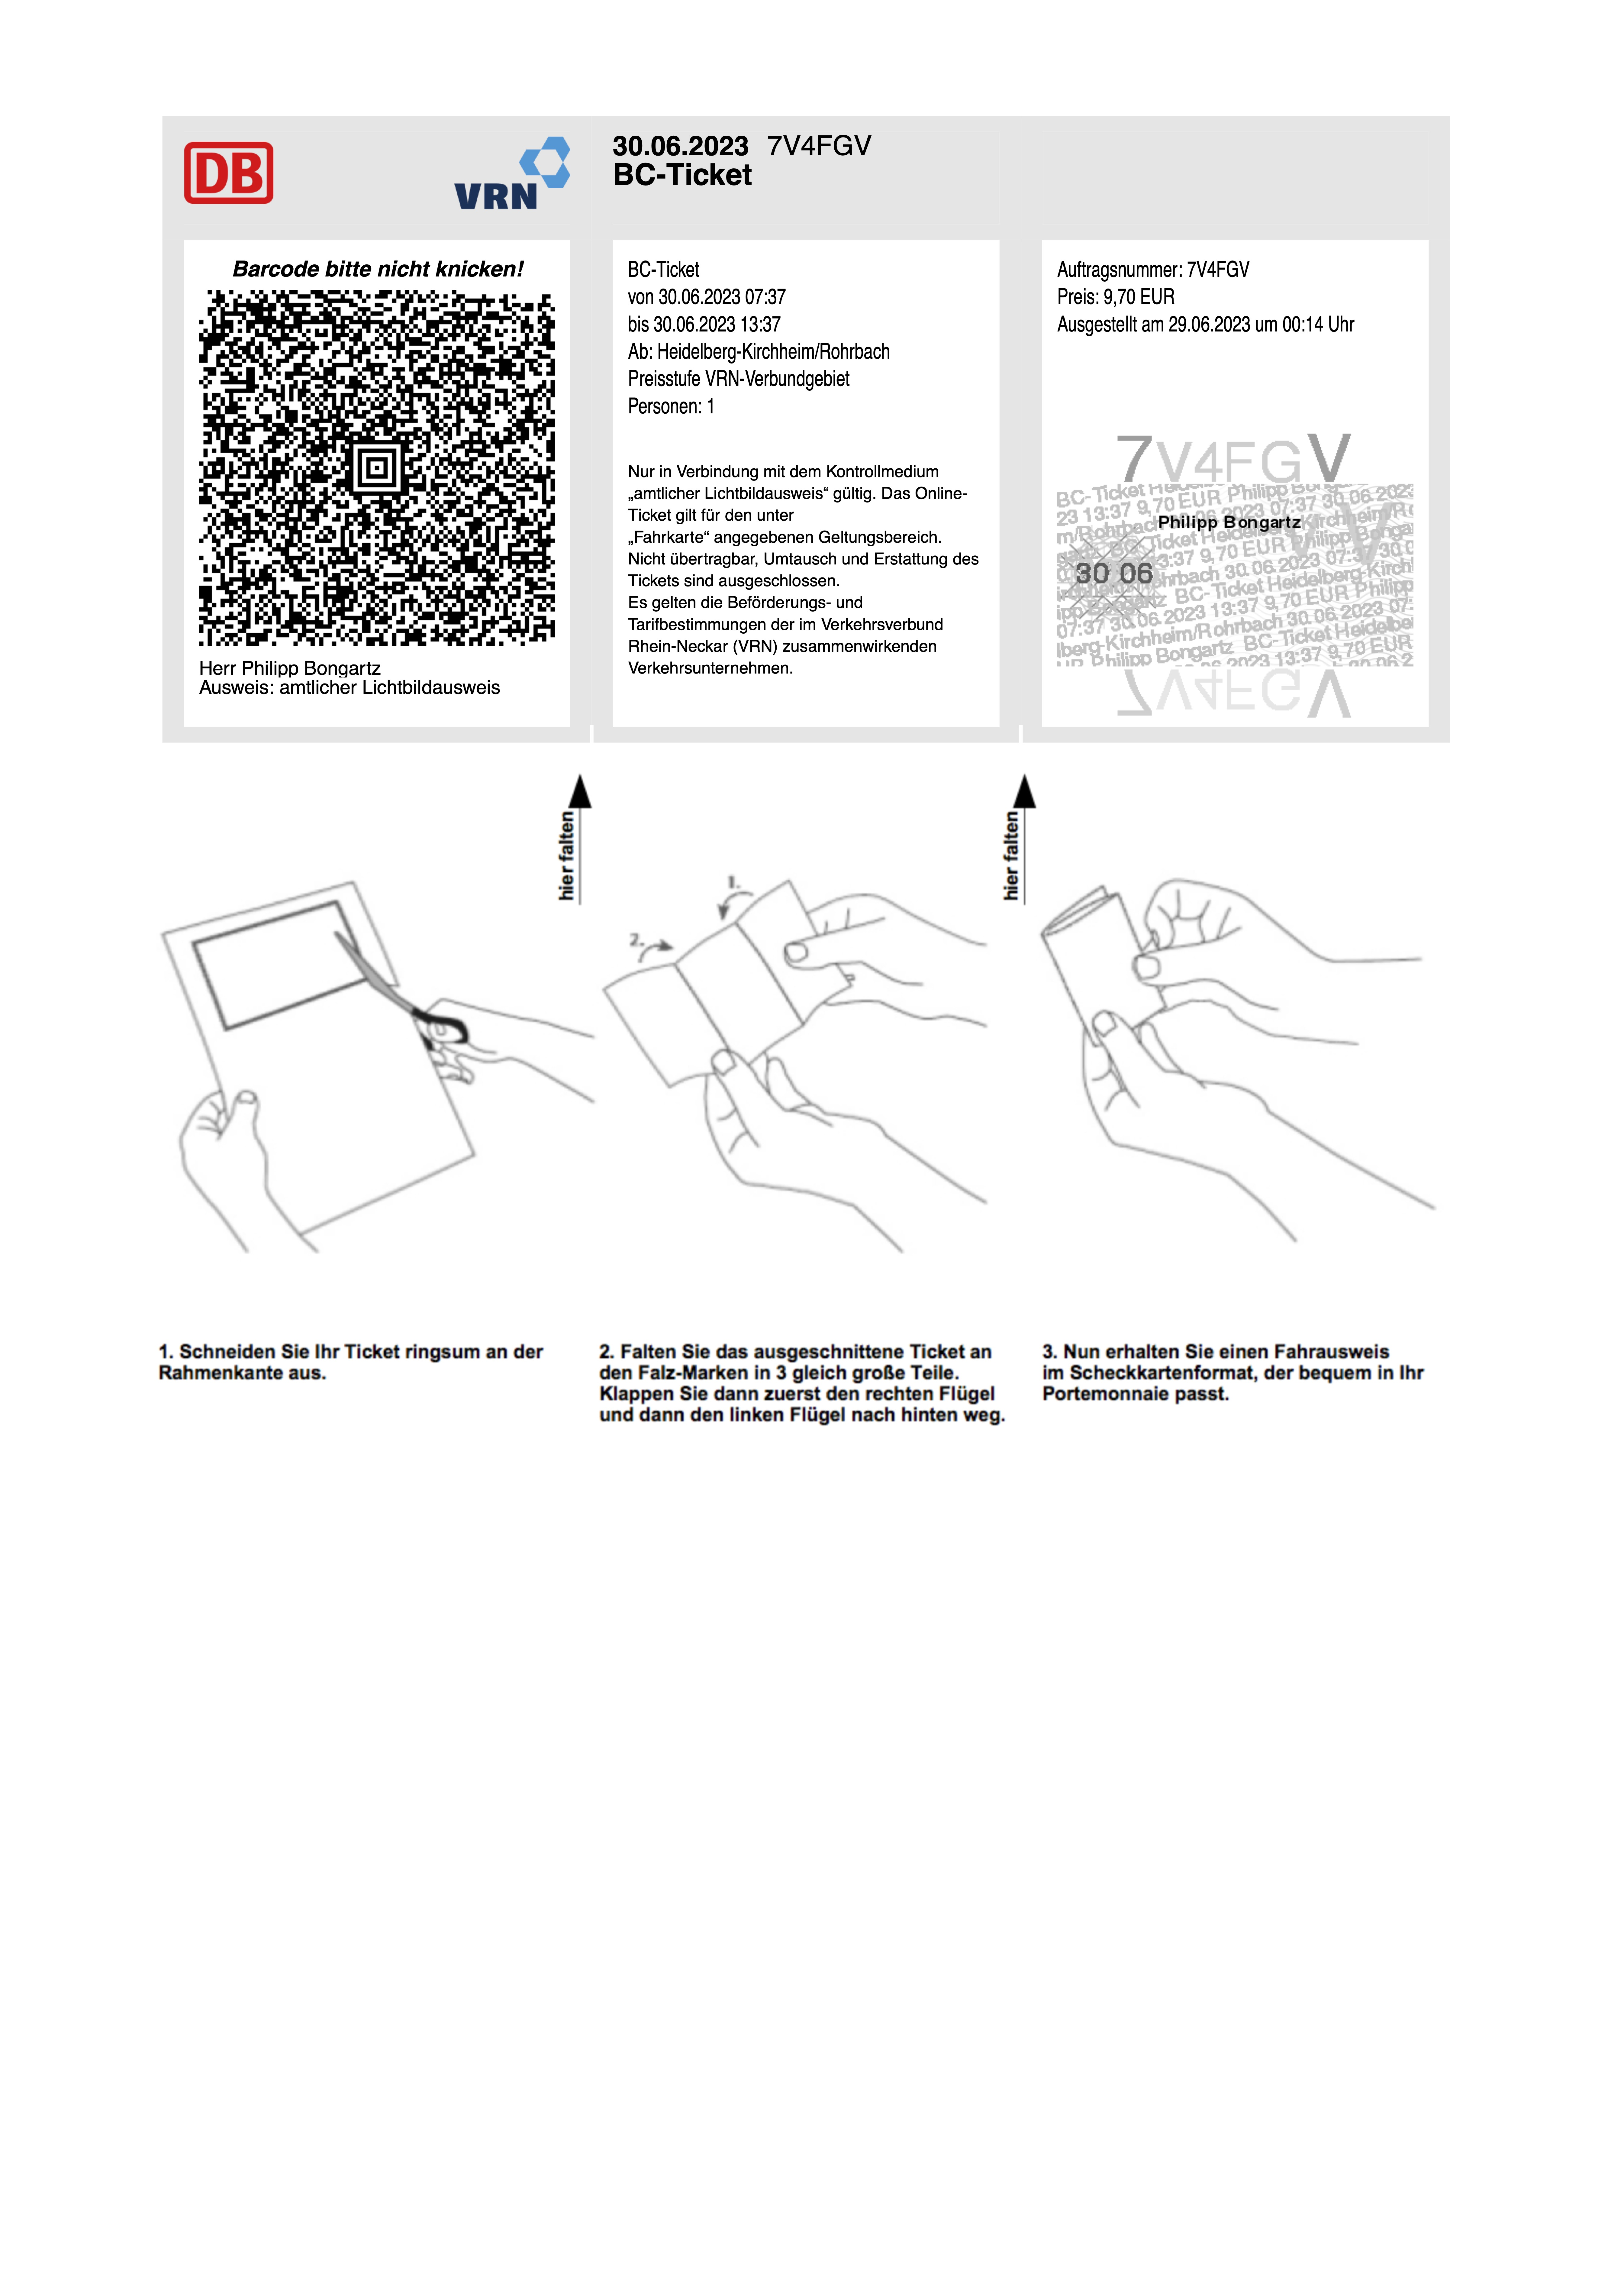

In [11]:

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "7V4FGV.jpeg"

# Getting the base64 string
base64_image = encode_image(image_path)


# Display the image
HTML(f'<img src="data:image/jpg;base64,{base64_image}"/>')



In [12]:
# OpenAI API Key
with open('/Users/phbo/Library/CloudStorage/OneDrive-EXXETA/Desktop/openai_key','r') as f:
    api_key = f.read()

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "Bitte extrahiere die Auftragsnummer aus diesem Bild."
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(response.json())

{'id': 'chatcmpl-8uPzSKTyFNZeHy4jamELQvYx65wL4', 'object': 'chat.completion', 'created': 1708456966, 'model': 'gpt-4-1106-vision-preview', 'usage': {'prompt_tokens': 1125, 'completion_tokens': 17, 'total_tokens': 1142}, 'choices': [{'message': {'role': 'assistant', 'content': 'Die Auftragsnummer auf dem Bild lautet "7V4FGV".'}, 'finish_reason': 'stop', 'index': 0}]}


### Alternativer Ansatz Textextraction --> Muss in anderes Env und Notebook

PDFs sind entweder direkt auslesbar oder über OCR (Optical Character Recognition) auslesbar 

In [ ]:
class Reader:
    """
    A class to read contents from various file formats like PDF, TXT, DOC, PPTX, DOCX, XLSX, and HTML.
    """
    def __init__(self):
        pass

    def read(self, file_path: str) -> str:
        """
        Reads the content of a file based on its extension.

        :param file_path: The path to the file.
        :return: The content of the file as a string.
        """
        if file_path.lower().endswith('.pdf'):
            return self.read_pdf(file_path)
 
        if file_path.lower().endswith('.txt'):
            return self.read_txt(file_path)
            
        if file_path.lower().endswith('.doc'):
            return self.read_doc(file_path)

        if file_path.lower().endswith('.pptx'):
            return self.read_pptx(file_path)
            
        if file_path.lower().endswith('.docx'):
            return self.read_docx(file_path)
            
        if file_path.lower().endswith('.xlsx'):
            return self.read_xlsx(file_path)
            
        if file_path.lower().endswith('.html'):
            return self.read_html(file_path)
 
        return ''

    
    def read_by_filetype(self, file_path: str, file_type: str) -> str:
        """
        Reads the content of a file based on a specified file type.

        :param file_path: The path to the file.
        :param file_type: The type of the file (e.g., 'PDF', 'MS Office (pre-2007)', etc.).
        :return: The content of the file as a string.
        """
        if file_type=='PDF':
            return self.read_pdf(file_path)
 
        if file_type=='Unicode text file':
            return self.read_txt(file_path)
        if file_type=='MS Office (pre-2007)':
            return self.read_doc(file_path)
        if file_type=='MS PowerPoint 2007+':
            return self.read_pptx(file_path)
        if file_type=='MS Word 2007+':
            return self.read_docx(file_path)
        if file_type=='MS Excel 2007+':
            return self.read_xlsx(file_path)
        if file_type=='HTML file':
            return self.read_html(file_path)
        if file_type=='ASCII text file':
            return self.read_txt(file_path)
        if file_type=='XML file':
            return self.read_html(file_path)
 
        return ''


    def read_pptx(self, file_path: str) -> str:
        """
        Reads the content of a PPTX file.

        :param file_path: The path to the PPTX file.
        :return: The text content of the PPTX file as a string.
        """
        presentation = Presentation(file_path)
        result = []
        for slide in presentation.slides:
            for shape in slide.shapes:
                if shape.has_text_frame:
                    for paragraph in shape.text_frame.paragraphs:
                        for run in paragraph.runs:
                            result.append(run.text)
        return "\n".join(result)
 
    def read_xlsx(self, file_path: str) -> str:
        """
        Reads the content of an XLSX file and returns it in CSV format.

        :param file_path: The path to the XLSX file.
        :return: The content of the XLSX file in CSV format as a string.
        """
        df = pd.read_excel(file_path, header=0)
        # Create a buffer
        buffer = io.StringIO()
        # Convert the DataFrame to CSV and save it to the buffer
        df.to_csv(buffer, index=False)
        # Get the CSV data as a string
        csv_as_string = buffer.getvalue()
        # Don't forget to close the buffer
        buffer.close()
        return csv_as_string
 
    def read_docx(self, file_path: str) -> str:
        """
        Reads the content of a DOCX file.

        :param file_path: The path to the DOCX file.
        :return: The text content of the DOCX file as a string.
        """
        doc = Document(file_path)
        result = []
        for para in doc.paragraphs:
            result.append(para.text)
        return "\n".join(result)
 
    def read_doc(self, file_path: str) -> str:
        """
        Reads the content of a DOC file, handling various possible formats.

        :param file_path: The path to the DOC file.
        :return: The text content of the DOC file as a string.
        """
        text = ""
        
        try:
            text = textract.process(file_path, extension= 'doc')
            text = text.decode('utf-8')
        
        except:
            try:
                text = textract.process(file_path, extension= '.xls')
                text = text.decode('utf-8')
            except:
                try:
                    text = textract.process(file_path, extension= '.ppt')
                    text = text.decode('utf-8')
                    
                except:
                    print("Old MS Office error")
        return text
 
    def read_pdf(self, file_path: str) -> str:
        """
        Reads the content of a PDF file, using OCR if necessary.

        :param file_path: The path to the PDF file.
        :return: The text content of the PDF file as a string.
        """
        try:
            reader = PdfReader(open(file_path,'rb'))
        except:
            print('PDF Auslesefehler')
            return 'PDF Auslesefehler'
        result = ""
        for page in reader.pages:
            result += page.extract_text()
        if len(result) < 1:
            result = self.read_pdf_ocr(file_path)
        return result
 

        
    def read_pdf_ocr(self, file_path: str) -> str:
        """
        Reads the content of a PDF file using OCR (Optical Character Recognition).

        :param file_path: The path to the PDF file.
        :return: The text content of the PDF file as a string.
        """
        print(f'OCR PDF READING : {file_path}')
        # Convert the PDF into images
        pages = convert_from_path(file_path)
 
        # Process each image with OCR
        page_texts = []
        for page in pages:
            page_text = pytesseract.image_to_string(page)
            page_texts.append(page_text)
 
        # Join the text of all pages together
        text = '\n'.join(page_texts)
        return text
 
    def read_txt(self, file_path: str) -> str:
        """
        Reads the content of a TXT file, detecting the character encoding.

        :param file_path: The path to the TXT file.
        :return: The text content of the TXT file as a string.
        """
 
        raw_data = open(file_path, 'rb').read()
        result = chardet.detect(raw_data)
        char_encoding = result['encoding']
 
        with open(file_path, 'r', encoding=char_encoding) as f:
            result = f.read()
 
        return result
 
    def read_html_old(self, file_path):
        html_content = open(file_path, 'rb').read()
        decoded_text = html.unescape(html_content)
 
        text = True
        output = ''
        for b in decoded_text:
            if b=='<':
                text=False
            if text:
                output += b
            if b=='>':
                output += ' '
                text = True
 
        output = output.replace('\xa0', ' ')
        return output
        
    def read_html(self, file_path: str) -> str:
        """
        Reads and cleans the content of an HTML file.

        :param file_path: The path to the HTML file.
        :return: The text content of the HTML file as a string.
        """
        with open(file_path, 'r', encoding='utf-8') as file:
            html_content = file.read()
        decoded_text = html.unescape(html_content)
        text_content = re.sub('<[^>]+>', ' ', decoded_text)
        clean_text = text_content.replace('\xa0', ' ')
        return clean_text.strip()